![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrais e Primitivas

Neste teste, vamos usar os métodos de integração para calcular primitivas de funções.

De forma análoga ao caso de EDOs, vamos retornar dois `np.array`s:
- um com os pontos onde a primitiva foi calculada; e
- outro com o valor da aproximação numérica da primitiva.

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 0: o método do retângulo

Para evitar efeitos de bordo e arredondamento, vamos usar o método do retângulo criando pontos com `np.linspace`:

In [218]:
def retangulo(f, a, b, n=1000):
    if a == b:
        return 0
    pts, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    integral = 0
    for pt in pts:
        integral += f(pt)*h
    return integral

Explique porque os pontos criados têm `endpoint=False`

O endpoint=False impede que o b seja incluido na lista de pontos. Caso o b estivesse na lista de pontos, estaríamos incluindo um retângulo a mais no nosso somatório de área: $f(b)\cdot h$. Lembrando que nosso método está "começando pela esquerda", ou seja, esse retângulo não faz parte do somatório que aproxima o resultado da nossa integral, pois soma uma área fora do intervalo de integração definido.

In [219]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) < 1e-3

In [220]:
ans = (np.cos(0) - np.cos(1))
assert abs(retangulo(np.sin, 0, 1) - ans) > 1e-4

In [221]:
ans = (np.cos(0) - np.cos(2))
assert 1e-5 < abs(retangulo(np.sin, 0, 2, n=10**4) - ans) < 1e-4

# Questão 1: O jeito fácil

Escreva uma função `primitiva_retangulo`,
que calcula a integral de $a$ até cada um dos pontos escolhidos,
**incluindo** $a$,
chamando o método do retângulo para cada um deles.

In [238]:
def primitiva_retangulo(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)



    primitivas = np.array([retangulo(f, a, pt, i) for i, pt in enumerate(pts)])

    return (pts, primitivas)

In [239]:
pts, Fs = primitiva_retangulo(np.sin, 0, 1)
assert len(Fs) == len(pts)

In [240]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [241]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

## Questão 2: Gráficos

Faça os gráficos dos erros de cálculo das primitivas, no intervalo $[0, 1.5]$, das seguintes funções:
- Seno
- Exponencial
- Cosseno

para quatro valores de passo: `1e-2`, `5e-3`, `2e-3` e `1e-3`.

Use 3 eixos, um para cada função, e 4 curvas em cada eixo.

Text(0.5, 1.0, 'Função Cosseno')

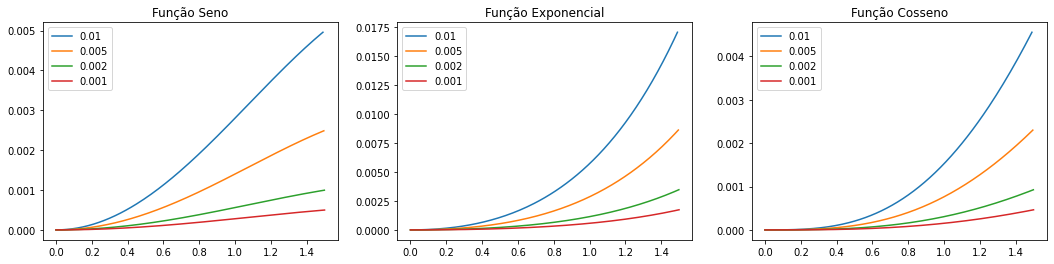

In [226]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))
hs = [1e-2, 5e-3, 2e-3, 1e-3]
erros_sen = []
erros_exp = []
erros_cos = []
#Função Seno
for h in hs:
    pts, primitivas =  primitiva_retangulo(np.sin, 0, 1.5, h)
    primitivas_verdadeiras  = (1 - np.cos(pts))
    erro = abs(primitivas_verdadeiras - primitivas)
    erros_sen.append(erro[-1])
    axs[0].plot(pts, erro, label=f"{h}")
    axs[0].legend()

#Função Exponencial
for h in hs:
    f = lambda x: np.e**x
    pts, primitivas =  primitiva_retangulo(f, 0, 1.5, h)
    primitivas_verdadeiras  = (np.e**pts - 1)
    erro = abs(primitivas_verdadeiras - primitivas)
    erros_exp.append(erro[-1])
    axs[1].plot(pts, erro, label=f"{h}")
    axs[1].legend()
    

#Função Cosseno
for h in hs:
    pts, primitivas =  primitiva_retangulo(np.cos, 0, 1.5, h)
    primitivas_verdadeiras  = (np.sin(pts))
    erro = abs(primitivas_verdadeiras - primitivas)
    erros_cos.append(erro[-1])
    axs[2].plot(pts, erro, label=f"{h}")
    axs[2].legend()
axs[0].set_title('Função Seno')
axs[1].set_title('Função Exponencial')
axs[2].set_title('Função Cosseno') 

In [227]:
for ax in axs:
    assert len(ax.lines) == 4
    assert len(ax.get_legend().texts) == 4
    assert len(ax.get_title()) > 0

In [228]:
for ax in axs:
    for l in ax.lines:
        assert max(np.abs(l.get_ydata())) < 2e-2

Qual o erro, na extremidade final do intervalo, para cada um dos métodos e valores de $h$?

Imprima uma tabela, com 3 colunas e 4 linhas (fora as "de título"), usando `print` formatado.

In [229]:
print("="*90)

print ("{:<15} {:<20} {:<35} {:<10}".format('hs','Seno','Exponencial', 'Cosseno'))
print("="*90)
for i in range(0, 4):
    print("{:<8} {:<25} {:<30} {:<10}".format( hs[i], erros_sen[i], erros_exp[i], erros_cos[i]))

print("="*90)




hs              Seno                 Exponencial                         Cosseno   
0.01     0.004958023140813839      0.01704264595470617            0.004557618924073137
0.005    0.0024864254370681182     0.008612354595586513           0.002300924742420607
0.002    0.0009963299809314652     0.003466949843417222           0.0009257000293115825
0.001    0.0004984566530908952     0.0017371563595731665          0.0004637402398023349


Como os erros se comportam ao diminuir o passo?  Isso é esperado?

Os erros diminuem ao diminuirmos o passo. Isso acontece porque quanto menor for o passo, menor é a largura dos retângulos utilizados para nossa aproximação. Com um passo pequeno, a função varia pouco e a retângulo se aproxima mais do "shape" dela. Dessa maneira, a redução de h diminui os erros individuais de cada retâgulo. Ou seja, dados dois pontos $x_i$ e $x_{i+1}$ distantes de h, um passo h suficientemente pequeno fará com que o valor de $f(x_i)$ e $f(x_{i+1})$ sejam mais próximos e nossa área se assemelhe cada vez mais com a área de um retângulo.

Como os erros se comportam ao longo do eixo dos $x$, ou seja, ao calcular primitivas "cada vez mais longe"?  Como você explica este fenômeno?

Para primitivas cada vez mais longe, o erro fica cada vez maior.  Quanto mais longe estamos do eixo x, maior é o intervalo de integração. Para um mesmo passo h, um intervalo de integração maior vai exigir um número maior de retângulos para que a integral da função seja aproximada. Cada retângulo está associado a um erro, que é justamente a diferença entre a área dele e a área real daquele subintervalo. O erro final será a soma dos erros dos nossos retângulos. Como estamos utilizando mais retângulos para a aproximação, as integrais com limites de integração mais distantes apresentarão um erro maior.



Como os erros se comportam para as diferentes funções?  Você esperava isso?

O erro da exponencial é maior do que os erros das funções trigonométricas, o que era esperado. Isso acontece porque o erro de cada retângulo depende não só de h, mas também da primeira derivada da função. Isso pode ser concluído tanto por uma expansão de Taylor, quanto por uma análise intuitiva do método. Funções com derivas mariores vão apresentar uma maior variação dentro daquele passo e, por isso, vão ser pior aproximadas por um retângulo, pois retângulos assumem variação nula. 

As derivadas das funções trigonométricas são também funções trigonométricas, que assumem valores entre 0 e 1. Já a derivada da função exponencial é uma função exponencial que assume valores cada vez maiores, conforme aumentamos x. É fácil de entender porque a função exponencial apresenta um erro maior, já que em geral o valor da sua derivada é maior e, portanto, sua função apresentar uma variação grande.

## Questão 3: O jeito mais rápido

Na questão anterior, ao calcular a primitiva de $[a, a+2h]$, era necessário calcular $f(a)$ e $f(a+h)$.
Ora, $f(a)$ já tinha sido calculada para a primitiva em $[a, a+h]$ (era o único termo!),
então podemos evitar estas contas repetidas.

Vamos fazer uma nova primitiva, `primitiva_rapida`, que calcula apenas uma vez `f(pts)`,
e calcula as somas parciais usando [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).

Explique porque é ruim (neste caso!) que `np.cumsum` **não** retorne a soma vazia.

In [230]:
np.cumsum([1,2])

array([1, 3], dtype=int32)

Isso é ruim, pois o primeiro elemento que queremos retornar no nosso array é: $$\int_{a}^{a} f(x) dx = 0$$

Para incluir a soma vazia (que vale zero!), use `np.hstack`.

In [231]:
np.hstack([[0], [1, 3]])

array([0, 1, 3])

In [242]:
def primitiva_rapida(f, a, b, h=0.01):
    """Primitiva da função  f, usando um passo de tamanho  h  no intervalo  [a,b]."""
    pts = np.arange(a, b, h)
    integrais = []
    for i in range(len(pts)-1):
        integrais.append(retangulo(f, pts[i], pts[i+1], 1))
    return (pts, np.hstack([[0], np.cumsum(integrais)]))

In [243]:
pts, Fs = primitiva_rapida(np.sin, 0, 1)
assert len(pts) == len(Fs)

In [244]:
assert np.allclose(Fs, 1 - np.cos(pts), atol=1e-2)

In [245]:
assert not np.allclose(Fs, 1 - np.cos(pts), atol=1e-3)

Ambas as funções devem ser (a menos de erro de truncamento / arredondamento) iguais:

In [246]:
_, Fs_original = primitiva_retangulo(np.sin, 0, 1)
assert np.allclose(Fs, Fs_original, atol=1e-15, rtol=1e-15)

## Questão 4: E terá valido a pena?

Observe as duas caixas abaixo

In [247]:
%time primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%time primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

Wall time: 1min 36s
Wall time: 1.04 s


In [257]:
%time primitiva_rapida(np.sin, 0, 1, h=1e-4)
%time primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

Wall time: 511 ms
Wall time: 44.9 ms


Quão mais rápido é o método usando `np.cumsum`?

O método cumsum é bem mais rápido. Podemos perceber isso só com as unidades, enquando os resultados do método original estão em minutos/segundos, os resultados do método com np.cumsum são gerados em milissegundos.

Podemos fazer a razão entre os tempos dos dois métodos para os diferentes passos, para termos uma ideia do quão menor é o tempo do método da primitiva rápida.


Observação: os valores abaixo foram obtidos com a minha máquina e não devem ser os mesmos em outras máquinas.



Para $h=10^{-4}$
$$
\frac{511 \cdot 10^{-3}}{96} = 0.0053
$$

Para $h=10^{-3}$
$$
\frac{ 44.9 \cdot 10^{-3}}{1.04} = 0.043
$$


Agora, observe com mais detalhe:

In [258]:
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-4)
%timeit primitiva_retangulo(np.sin, 0, 1, h=1e-3)
None

1min 43s ± 4.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.07 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [259]:
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-4)
%timeit primitiva_rapida(np.sin, 0, 1, h=1e-3)
None

519 ms ± 65.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
47.9 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Quantas vezes mais lento é o método "simples" com passo 10 vezes menor?

E quantas vezes mais lento é o método `np.cumsum` com passo 10 vezes menor?

Isso ajuda a explicar as diferenças acima?

O tempo cresce linearmente com o decrescimento de h em 10 vezes no caso da primitiva rápida, já que não estamos repitindo operações. Para a primitiva do retangulo, o tempo cresce quase que exponencialmente com o decrescimento de h em 10 vezes. Acima, percebemos que os loops da função primitiva_retangulo duram em média um tempo muito maior do que os lops da função primitiva_rapida. Isso porque a função primitiva_rapida evita o recálculo de áreas, fazendo com que cada loop seu leve praticamente o mesmo tempo para ser executado. Entretando, a função primitiva_retangulo calcula a área desde o ponto inicial, fazendo com que seus loops cada vez demorem mais, o que sobe a média.